In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

In [13]:
np.arctan2(7,18) * 180/np.pi, 1/np.tan(20/180.0 * np.pi), 1.2*16/9.0, 1.3/0.75, 1.3*2.3, 1.0*1.8, 

(21.25050550713324,
 2.7474774194546225,
 2.1333333333333333,
 1.7333333333333334,
 2.9899999999999998,
 1.8)

In [15]:
len(None)

TypeError: object of type 'NoneType' has no len()

## Odour Field

In [139]:
from gaussian_plume_model import OdourField

# odour source param
sx = 0
sy = 0
q = 1
u = 0.02
w_dir = -3*np.pi/7

od = OdourField(q, u, w_dir, sx=sx, sy=sy)

In [140]:
x = np.linspace(-2, 2, 40)
y = np.linspace(-12, 2, 120)
mesh_x, mesh_y = np.meshgrid(x, y)
# x = np.linspace(-20, 20, 40)
# y = np.linspace(-140, 0, 140)
# mesh_x, mesh_y = np.meshgrid(x, y)

mesh_c = od.get_odour_concentration(mesh_x, mesh_y)

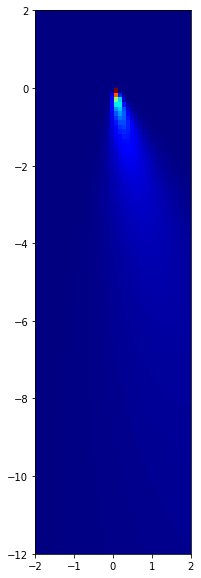

In [141]:
fig, ax = plt.subplots(figsize=(5,10))
ax.pcolormesh(mesh_x, mesh_y, mesh_c, cmap='jet')
ax.set_aspect(1)

In [54]:
# get odour concentration at specific position
od.get_odour_concentration(0.0,-0.1)

19.947114020070636

## Ants

In [166]:
from odor_wind_navigation import OdourWindNavigationAnt

# odour source param
sx = 0
sy = 0
q = 10
u = 10
w_dir = np.pi
pi_initial_memory = 0.1

OwN_ant = OdourWindNavigationAnt(pi_initial_memory, q, u, w_dir, sx, sy)

In [167]:
# get the concentration heatmap of the odour
x = np.linspace(-2, 2, 40)
y = np.linspace(-12, 2, 120)
mesh_x, mesh_y = np.meshgrid(x, y)

mesh_c = OwN_ant.odour_field.get_odour_concentration(mesh_x, mesh_y)

In [93]:
# generate the PI memory
pi_len = 5.5 # m
pi_dir = -90 # deg
pi_memory = OwN_ant.generate_pi_memory(pi_len, pi_dir, pi_initial_memory)

time_out = 500

# run a trial
start_pos1 = [-1.5,-10]
start_pos2 = [1.5,-10]
start_h = 0

step_size = 0.04 # m
motor_k = 1.0

w_dir = np.pi * np.ones(time_out)
t, odor, pos, h, velocity, pi_memory, ra_memory = OwN_ant.odour_gated_wind_homing(start_pos1, start_h, time_out,
                                                                                w_dir,
                                                                                motor_k=motor_k, step_size=step_size, 
                                                                                pi_only=False)

$-Start homing...
$-End homing with nest distance 0.09 m


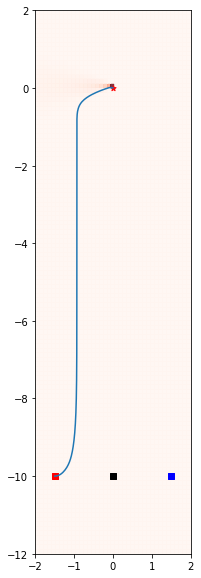

In [107]:
fig,ax=plt.subplots(figsize=(5,10))
ax.pcolormesh(mesh_x, mesh_y, mesh_c, alpha=0.8, cmap='Reds')
# feeder
ax.scatter(0,-10,marker='s',c='k',s=30)
# nest
ax.scatter(0,0,marker='*',c='r',s=30)
# RP1
ax.scatter(-1.5,-10,marker='s',c='r',s=30)
# RP2
ax.scatter(1.5,-10.,marker='s',c='b',s=30)

# homing route
ax.plot(pos[:,0],pos[:,1])

ax.set_aspect(1)

([<matplotlib.lines.Line2D at 0xffe1d90>], 266)

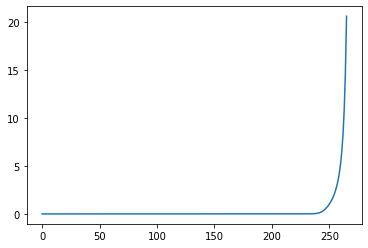

In [97]:
plt.plot(odor[:t]),t

## Flies

In [2]:
from odor_wind_navigation import OdourWindNavigationFly

# odour source param
sx = 0
sy = 0
q = 10
u = 10
w_dir = -np.pi/2
OwN_fly = OdourWindNavigationFly(q, u, w_dir, sx, sy)

In [3]:
# get the concentration heatmap of the odour
x = np.linspace(-20, 20, 40)
y = np.linspace(-140, 0, 140)
mesh_x, mesh_y = np.meshgrid(x, y)
mesh_c = OwN_fly.odour_field.get_odour_concentration(mesh_x, mesh_y)

In [68]:
# run a trial
start_pos = [10,-100]
start_h = np.pi

time_out = 300

step_size = 0.2
motor_k = 1.5

wind_direction = -np.pi/2 * np.ones(time_out)

# generate odour dynamics
odour_on_period = [100,time_out-100]
odour_input = np.zeros(time_out)
odour_input[odour_on_period[0]:odour_on_period[1]] = 1.0

OwN_fly.odour_on_thr = 0.01
pos, h, v, odor, dis, t = OwN_fly.run(start_pos, start_h, time_out,
                               odour_input, wind_direction, strategy='integrated', oh_k=5e3,
                               step_size=step_size, motor_k = motor_k)

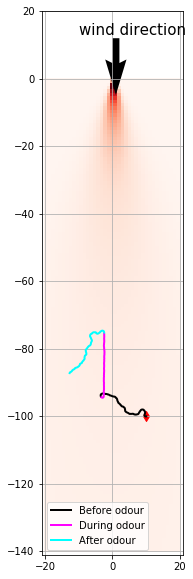

In [69]:
fig,ax=plt.subplots(figsize=(5,10))
# odour concentration
ax.pcolormesh(mesh_x, mesh_y, mesh_c, cmap='Reds')
# trajectory
ax.plot(pos[:odour_on_period[0],0],pos[:odour_on_period[0],1],c='k',lw=2, label='Before odour')
ax.plot(pos[odour_on_period[0]:odour_on_period[1],0],pos[odour_on_period[0]:odour_on_period[1],1],c='magenta',lw=2,label='During odour')
ax.plot(pos[odour_on_period[1]:,0],pos[odour_on_period[1]:,1],c='cyan',lw=2, label='After odour')

# start point
ax.scatter(start_pos[0],start_pos[1],c='red',s=50,marker='d')
# wind direction
ax.quiver(1,12,np.cos(-np.pi/2),np.sin(-np.pi/2),width=0.05,scale=2.5)
ax.text(-10,13,'wind direction',fontsize=15)
ax.set_xlim(-21,21)
ax.set_ylim(-141,20)
ax.set_aspect(1)
ax.grid(1)
ax.legend()

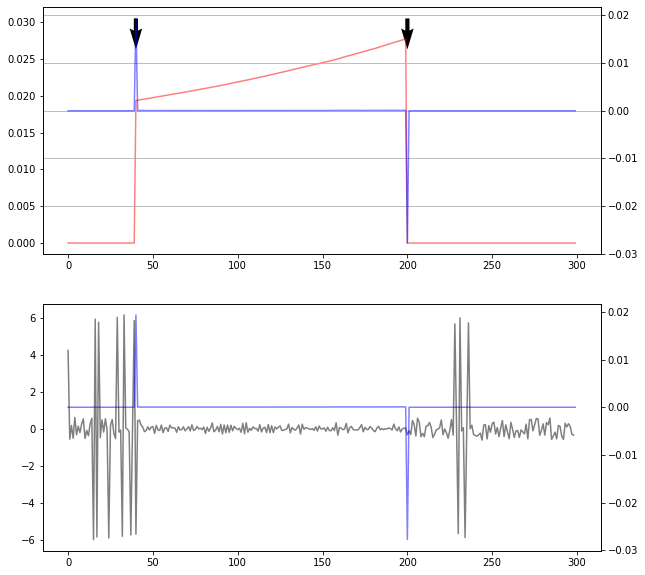

In [186]:
# plot the odor sense
fig, ax = plt.subplots(2,1,figsize=(10,10))

ax[0].plot(odor, lw=1.5, c='red', alpha=0.5, label='C')
ax_w = ax[0].twinx()
ax_w.plot(delta_odour, lw=1.5, c='blue', alpha=0.5, label='')
# ax[0].grid(1)
ax_w.grid(1)

ax1_w = ax[1].twinx()
ax[1].plot(np.roll(h[1:],1) - h[1:], c='k', alpha=0.5)
ax1_w.plot(delta_odour, lw=1.5, c='blue', alpha=0.5, label='')    

ax[0].quiver(odour_on_period[0], max(odor)*1.1, 0, -1)
ax[0].quiver(odour_on_period[1], max(odor)*1.1, 0, -1)

In [84]:
# run serials of trials
trial_num = 20
strategies = ['odour_homing', 'odour_gated_upwind', 'integrated']

time_out = 300
step_size = 0.3
motor_k = 1.0

wind_direction = -np.pi/2 * np.ones(time_out)

OwN_fly.odour_on_thr = 0.01

# store the data
pos_s = []
h_s = []
odor_s = []
dis_s = []
t_s = []
strategy = strategies[2]
# generate odour dynamics
odour_on_period = [100, time_out-100]
odour_input = np.zeros(time_out)
odour_input[odour_on_period[0]:odour_on_period[1]] = 1.0

for trial in range(trial_num):
    print('%dth trial -> %s:' % (trial, strategy))
    # x in [-15,15], y in []
    start_pos = [30.0*(np.random.rand(1)-0.5), np.random.rand(1)*80.0 - 120.0]
    start_h = np.random.rand(1)*np.pi*2
    pos, h, v, odor, dis, t = OwN_fly.run(start_pos, start_h, time_out,
                                       odour_input, wind_direction, strategy=strategy, oh_k=5e4,
                                       step_size=step_size, motor_k = motor_k)
    pos_s.append(pos)
    h_s.append(h)
    odor_s.append(odor)
    dis_s.append(dis)
    t_s.append(t)

0th trial -> integrated:
1th trial -> integrated:
2th trial -> integrated:
3th trial -> integrated:
4th trial -> integrated:
5th trial -> integrated:
6th trial -> integrated:
7th trial -> integrated:
8th trial -> integrated:
9th trial -> integrated:
10th trial -> integrated:
11th trial -> integrated:
12th trial -> integrated:
13th trial -> integrated:
14th trial -> integrated:
15th trial -> integrated:
16th trial -> integrated:
17th trial -> integrated:
18th trial -> integrated:
19th trial -> integrated:


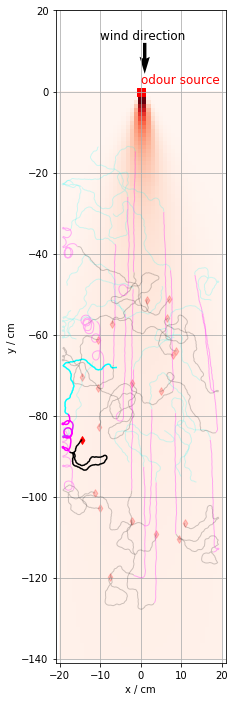

In [94]:
# plot trial results
fig,ax = plt.subplots(figsize=(4,12))

# odour concentration
ax.pcolormesh(mesh_x, mesh_y, mesh_c, cmap='Reds')

# odour source
ax.scatter(sx, sy, s=50, color='r', marker='s')
ax.text(0, 2, 'odour source',color='red', fontsize=12)
# wind direction
ax.quiver(1,12,np.cos(-np.pi/2),np.sin(-np.pi/2),width=0.02,scale=5.5)
ax.text(-10,13,'wind direction',fontsize=12)

# select one typical route
selected_id = 9
pos = pos_s[selected_id]
 # start point
ax.scatter(pos[0,0],pos[0,1],c='red',s=30,marker='d')
ax.plot(pos[:odour_on_period[0],0],pos[:odour_on_period[0],1],c='k',lw=1.5, label='Before odour')
ax.plot(pos[odour_on_period[0]:odour_on_period[1],0],pos[odour_on_period[0]:odour_on_period[1],1],c='magenta',lw=1.5,label='During odour')
ax.plot(pos[odour_on_period[1]:,0],pos[odour_on_period[1]:,1],c='cyan',lw=1.5, label='After odour')

for i, pos in enumerate(pos_s):
    if i!=selected_id:
        # start point
        ax.scatter(pos[0,0],pos[0,1],c='red',s=30,marker='d', alpha=0.2)
        # trajectory
        ax.plot(pos[:odour_on_period[0],0],pos[:odour_on_period[0],1],c='k',lw=1.0, alpha=0.2, label='Before odour')
        ax.plot(pos[odour_on_period[0]:odour_on_period[1],0],pos[odour_on_period[0]:odour_on_period[1],1],
                alpha=0.3, c='magenta',lw=1.0,label='During odour')
        ax.plot(pos[odour_on_period[1]:,0],pos[odour_on_period[1]:,1],
                alpha=0.2, c='cyan',lw=1.0, label='After odour')

ax.set_xlim(-21,21)

ax.set_ylim(-141,20)
ax.set_xlabel('x / cm')
ax.set_ylabel('y / cm')
ax.set_aspect(1)
ax.grid(1)
# ax.legend()

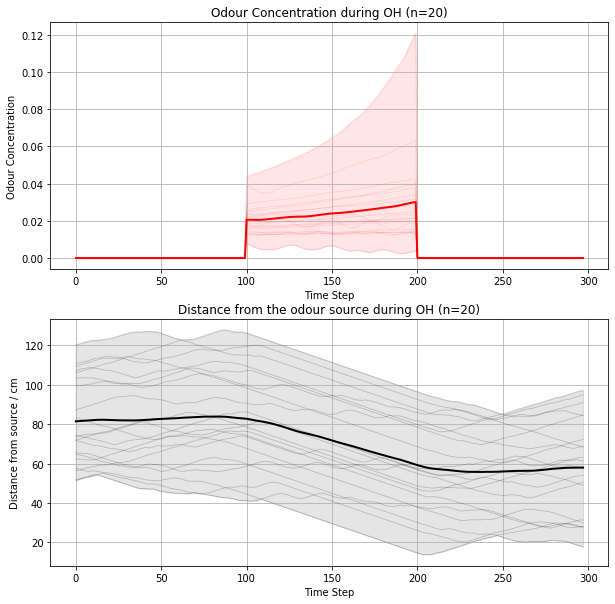

In [90]:
# intermedia results
fig,ax = plt.subplots(2,1,figsize=(10,10))
for i, odor_c in enumerate(odor_s):
    ax[0].plot(odor_c[:t_s[i]], c='red', alpha=0.1, lw=0.8)
for i, dis in enumerate(dis_s):
    ax[1].plot(dis[:t_s[i]], c='k', alpha=0.2, lw=0.8)

ax[0].plot(np.mean(np.array(odor_s)[:,:min(t_s)], axis=0), color='red',lw=2)
ax[1].fill_between(np.arange(0,min(t_s)), np.max(np.array(dis_s)[:,:min(t_s)], axis=0), np.min(np.array(dis_s)[:,:min(t_s)], axis=0),
                  color='k', alpha=0.1)
ax[0].fill_between(np.arange(0,min(t_s)), np.max(np.array(odor_s)[:,:min(t_s)], axis=0), np.min(np.array(odor_s)[:,:min(t_s)], axis=0),
                  color='r', alpha=0.1)
ax[1].plot(np.mean(np.array(dis_s)[:,:min(t_s)], axis=0), color='k',lw=2)
ax[0].set_title('Odour Concentration during OH (n=20)')
ax[0].set_ylabel('Odour Concentration')
ax[1].set_title('Distance from the odour source during OH (n=20)')
ax[1].set_ylabel('Distance from source / cm')
for a in ax:
    a.grid(1)
    a.set_xlabel('Time Step')


In [274]:
np.odor_s[:,:min(t_s)]　

TypeError: list indices must be integers or slices, not tuple

In [60]:
from odor_wind_navigation import OdourWindNavigationFly

# odour source param
sx = 0
sy = 0
q = 10
u = 10
w_dir = -np.pi/2
OwN_fly = OdourWindNavigationFly(q, u, w_dir, sx, sy)

In [61]:
# test upwind direction encoding
current_h = np.pi/2
wind_dir = -np.pi/4
OwN_fly.cx.global_current_heading(current_h)
OwN_fly.update_upwind_activation(current_h, wind_dir)

1 4


array([1.        , 1.        , 0.78408704, 0.63023288, 0.62992573,
       0.86551737, 1.        , 0.94750445])

In [29]:
def decode_dir_from_activation(activation, prefs):
    return np.arctan2(np.sum(activation*np.sin(prefs)), np.sum(activation*np.cos(prefs)))

In [62]:
decode_dir_from_activation(OwN_fly.cx.I_tb1, OwN_fly.wind_neuron_pref), decode_dir_from_activation(OwN_fly.upwind_direction, OwN_fly.wind_neuron_pref)

(-1.570796326794897, -0.46412075646750967)

In [33]:
OwN_fly.wind_direction_encoder.wpn

-1.414213562373095

In [142]:
a = {a:'1', '2':2}
a.1

SyntaxError: invalid syntax (<ipython-input-142-8299d62c1fa1>, line 2)

In [59]:
from insect_brain_model import WindDirectionEncoder

wd = WindDirectionEncoder()

current_h = np.pi/2
wind_dir = -np.pi/4

wd.upwind_activation(current_h, wind_dir)

1.414213562373095

In [55]:
theta = np.linspace(-np.pi, np.pi, 20)
apn = np.sin(-theta-np.pi)
b1 = np.sin(theta-np.pi)
wpn = apn - b1

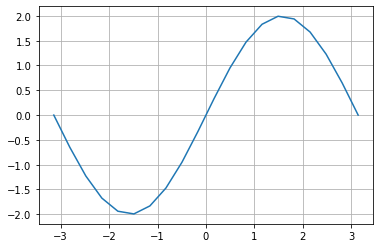

In [56]:
plt.plot(theta, wpn)
plt.grid(1)

In [24]:
np.roll([1,2,3],1 )

array([3, 1, 2])

In [17]:
import time

time.time()

1599532858.5932114